In [1]:
import cv2

In [2]:
img = cv2.imread('../footage/kim-sejeong.jpg')
img.shape

(647, 431, 3)

# Image Crop 

In [3]:
img_crop = img[0:300 , 0:300]
cv2.imshow('croped-image', img_crop)
cv2.imshow('orginal-image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
h,w,c = img.shape

x_min = int(input(f"Input x_min [0-{w}"))
x_max = int(input(f"Input x_max [{x_min}-{w}"))
y_min = int(input(f"Input y_min [0-{h}"))
y_max = int(input(f"Input y_max [{y_min}-{h}"))

img_crop2 = img[y_min:y_max , x_min:x_max]

cv2.imshow("img-crop2", img_crop2)
cv2.imshow("img-ori", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
y_min, y_max, x_min, x_max = 0,0,0,0

def image_crop(event,x,y,flags,param):
    global x_min,y_min,x_max,y_max

    if event == cv2.EVENT_LBUTTONDOWN:
        x_min,y_min,x_max,y_max = x,y,x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        x_max,y_max = x,y

    elif event == cv2.EVENT_LBUTTONUP:
        croped_img = img[y_min:y_max , x_min:x_max]
        cv2.imshow('croped_img', croped_img)
        cv2.imwrite('cropped_img.jpg', croped_img)
        print("croped image saved successfully!")

cv2.namedWindow("Original_img")
cv2.setMouseCallback("Original_img", image_crop)

while True:
    cv2.imshow("Original_img", img)
    if cv2.waitKey(1)==ord('q'):
        break
cv2.destroyAllWindows()


# Image Resize

In [6]:
ratio = float(input("Input image ratio [ 0 - 1,0 ]: "))

img_resize = cv2.resize(img, (int(w*ratio), int(h*ratio)))

cv2.imshow("ori-img", img)
cv2.imshow("resized-img", img_resize)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
img_resize2 = cv2.resize(img, (0,0),fx=0.7,fy=0.7)

cv2.imshow("ori-img", img)
cv2.imshow("resized-img", img_resize2)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Larging & Shrinking Image

dalam cv2 kita bisa menggunakan metode interpolation dan yang kita akan bahasa disini ada 4 function interpolation yaitu:

## Untuk Shrinking
- cv2.INTER_NEAREST : This is using a nearest-neighbor interpolation to shrink an image.
- cv2.INTER_AREA : This is used when we need need to shrink an image.

## Untuk LARGING
- cv2.INTER_LINEAR : This is primarily used when larging is required (default).
- cv2.INTER_CUBIC : This is slow for larging image, but more efficient (higer quality).

In [8]:

img_resize = cv2.resize(img, (0,0), fx=2.5, fy=2.5) # LINEAR
img_resize_INTER_NEAREST = cv2.resize(img, (0,0), fx=0.5, fy=0.5, interpolation=cv2.INTER_NEAREST) 

# show image 
cv2.imshow('Original Image', img)
cv2.imshow('INTER_LINEAR Resized Image', img_resize)
cv2.imshow('INTER_NEAREST Resized Image', img_resize_INTER_NEAREST)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Image Blending

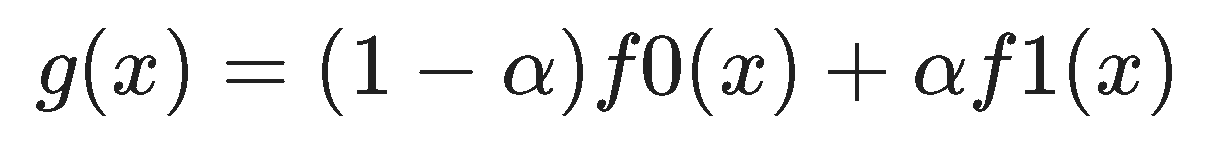

Rumus ini sering digunakan dalam image blending untuk menggabungkan dua gambar secara halus.


- f0(x) dan f1(x) adalah 2 gambar yang akan digabungkan.
- g(x) adalah hasil interpolasi gabungan dari 2 gambar
- α adalah parameter blending yang menentukan seberapa besar kontribusi setiap gambar dalam hasil akhirnya. Nilai α berkisar antara 0 dan 1.
- jika α=0 maka haslinya adalah gambar f0(x)
- jika α=1 maka haslinya adalah gambar f1(x)
- Jika α berada di antara 0 dan 1, gambar hasil blending akan menjadi kombinasi kedua gambar dengan bobot yang sebanding dengan nilai α.

In [9]:
img2 = cv2.imread('../footage/lavender.jpeg')
img2.shape

(1920, 1367, 3)

In [14]:
img2 = cv2.resize(img2, (431,647))
cv2.imshow("img2", img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
img.shape

(647, 431, 3)

In [12]:
img2.shape

(647, 431, 3)

In [16]:
alpha = float(input("Input the alpha [0 - 1.0]: "))

beta = (1- alpha)
blending_img = cv2.addWeighted(img,alpha,img2, beta,0.0)

cv2.imshow("blending_img", blending_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

- ALPHA : define melalui input
- BETA  : hasil 1 dikurang ALPHA
- GAMMA : default nya adalah 0.0

# Gray Scale

In [18]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.imshow('gray-img', img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Opacity

In [23]:
img_opacity = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)

cv2.imshow('bgra-img', img_opacity)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
img_opacity[:,:,3] = 127

In [26]:
img_opacity[0,0]

array([ 55,  58,  63, 127], dtype=uint8)

In [27]:
cv2.imwrite('img_opacity-adj.png', img_opacity)

True